# 📈 Random Walks, Brownian Motion & Monte Carlo Simulation
This notebook blends three foundational ideas in probability and modeling:

- **Random Walks**: Discrete, step-based models of uncertainty
- **Brownian Motion**: Continuous-time analog of random walks, key in finance
- **Monte Carlo Simulation**: Using random sampling to approximate complex outcomes

🎯 These concepts are critical for applications in:
- Stock price modeling
- Risk analysis
- Predictive maintenance
- Signal processing
- Agent-based simulations

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 🔁 Part 1: Random Walks
A **random walk** is a series of steps where each step is chosen randomly.
In 1D, each step is typically +1 or -1. We sum these to get a trajectory.
This models systems where values drift over time — like stock prices, health metrics, etc.

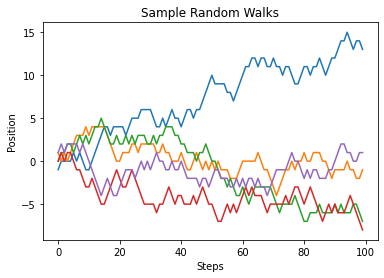

In [2]:
def generate_random_walk(n_steps, rng):
    steps = rng.integers(-1, 2, size=n_steps)
    return np.cumsum(steps)

# Plot a few sample walks
for _ in range(5):
    walk = generate_random_walk(100, rng)
    plt.plot(walk)
plt.title('Sample Random Walks')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.show()

## 🌊 Part 2: Brownian Motion
**Brownian motion** is the continuous-time limit of random walks.
We simulate it by scaling normal noise with time and square root of variance.
It’s the basis for stochastic calculus and used heavily in finance (e.g., Black-Scholes model).

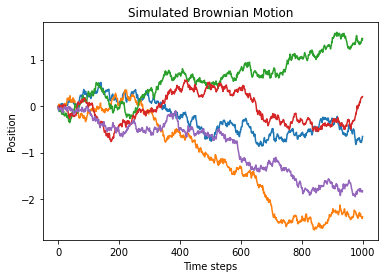

In [3]:
def simulate_brownian_motion(T=1.0, N=1000):
    dt = T / N
    increments = rng.normal(loc=0, scale=np.sqrt(dt), size=N)
    path = np.cumsum(increments)
    return path

for _ in range(5):
    bm = simulate_brownian_motion()
    plt.plot(bm)
plt.title('Simulated Brownian Motion')
plt.xlabel('Time steps')
plt.ylabel('Position')
plt.show()

## 🎲 Part 3: Monte Carlo Simulation
**Monte Carlo** methods use repeated random sampling to estimate properties of a system.
We'll estimate the probability that a Brownian motion path ever exceeds a threshold (e.g., 2.0).

In [4]:
def monte_carlo_crossing(threshold=2.0, n_reps=10000):
    count = 0
    for _ in range(n_reps):
        path = simulate_brownian_motion()
        if np.any(path > threshold):
            count += 1
    return count / n_reps

prob = monte_carlo_crossing()
print(f'Estimated probability of exceeding 2.0: {prob:.4f}')

Estimated probability of exceeding 2.0: 0.0413


## 📌 Summary
- Random walks model discrete steps in uncertain environments.
- Brownian motion models continuous random behavior — especially useful in finance.
- Monte Carlo simulation is a practical tool to estimate probabilities when analytical math is too hard.

